# Table of Contents
 <p>

the follows are from: http://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

a good ref: https://people.duke.edu/~rnau/411home.htm

In [51]:
import numpy as np
import pandas as pd
from pandas import datetime
from pandas.tools.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

In [58]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('arima_sample.csv', skiprows=range(38, 40), 
                     header=0, 
                     parse_dates=[0], index_col=0, date_parser=parser,
                     squeeze=True, )
series.name = 'sale'

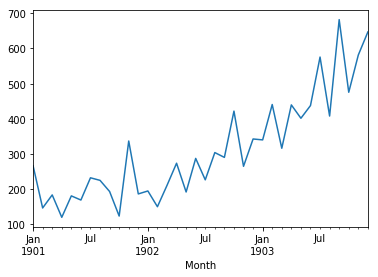

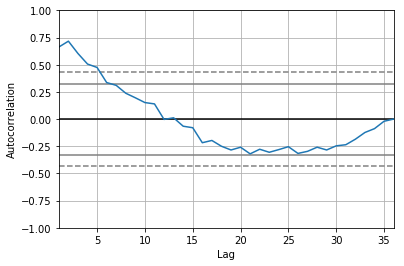

In [79]:
series.plot()
plt.show()
autocorrelation_plot(series, )
plt.show()

In [92]:
order = (5, 1, 0)
model = ARIMA(series, order=order)
model_fit = model.fit()

# model_fit.summary()

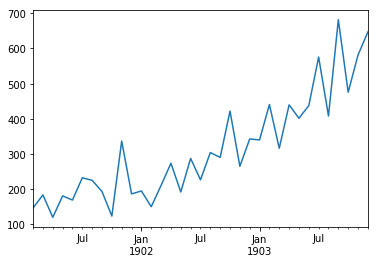

In [110]:
# reconstruct the time series
pred = model_fit.predict(1, typ='levels')
(pred + residuals.squeeze()).plot()

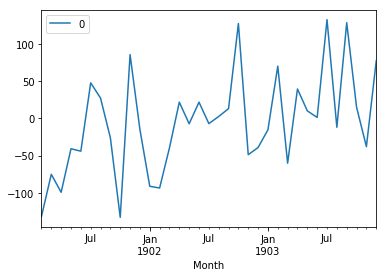

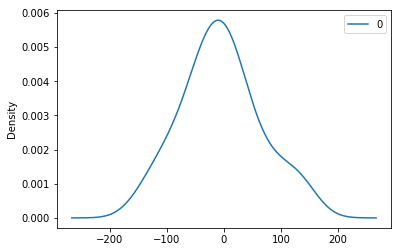

                0
count   35.000000
mean    -5.495168
std     68.132885
min   -133.296567
25%    -42.477832
50%     -7.186492
75%     24.748383
max    133.237996


In [83]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=349.117623, expected=342.300000
predicted=306.513007, expected=339.700000
predicted=387.376493, expected=440.400000
predicted=348.154172, expected=315.900000
predicted=386.308823, expected=439.300000
predicted=356.082006, expected=401.300000
predicted=446.379468, expected=437.400000
predicted=394.737295, expected=575.500000
predicted=434.915545, expected=407.600000
predicted=507.923419, expected=682.000000
predicted=435.483044, expected=475.300000
predicted=652.743812, expected=581.300000
predicted=546.343408, expected=646.900000
Test MSE: 6958.325


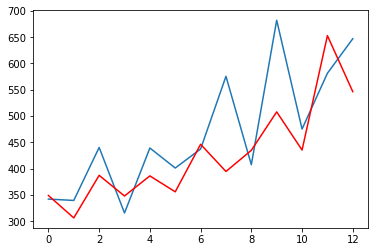

In [68]:
from sklearn.metrics import mean_squared_error
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# use n - 1 data to predict n; increment n to get all predictions 
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()